<a href="https://colab.research.google.com/github/sandyreni27/AI-FOR-ELECTRONICS-ENGINEERS/blob/main/modulation_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()



In [2]:
!ls



modulation_dataset.xlsx  sample_data


In [3]:
import pandas as pd
df = pd.read_excel("modulation_dataset.xlsx")
print(df.head())


   sample_0  sample_1  sample_2  sample_3  sample_4  sample_5  sample_6  \
0  0.613297  0.578148  0.594157  0.995073  0.830453  0.797478  0.843206   
1  0.072408  0.099767  0.333703  0.237022  0.394760  0.537164  0.553599   
2 -0.012413  0.355989  0.495785  0.833910  1.014574  0.955772  0.897018   
3 -0.088308  0.072342  0.239814  0.404177  0.386150  0.766417  0.640060   
4 -0.212390  0.085992  0.198547  0.420098  0.562017  0.828058  0.835725   

   sample_7  sample_8  sample_9  ...  sample_91  sample_92  sample_93  \
0  0.922381  0.937385  1.014063  ...  -0.270114  -0.415751  -0.443426   
1  1.064927  0.734747  0.996356  ...  -0.989151  -0.707360  -0.652680   
2  0.857660  0.825545  0.548132  ...   0.782007   0.728548   1.120714   
3  0.998132  0.797020  1.087596  ...   0.305871   0.467736   0.555676   
4  0.768944  0.806796  0.998532  ...   0.220526   0.385606   0.329210   

   sample_94  sample_95  sample_96  sample_97  sample_98  sample_99  label  
0  -0.676719  -0.723625  -0.90951

Accuracy: 0.95

Classification Report:
               precision    recall  f1-score   support

          AM       0.84      1.00      0.91        16
          FM       1.00      0.96      0.98        24
          PM       1.00      0.90      0.95        20

    accuracy                           0.95        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.96      0.95      0.95        60



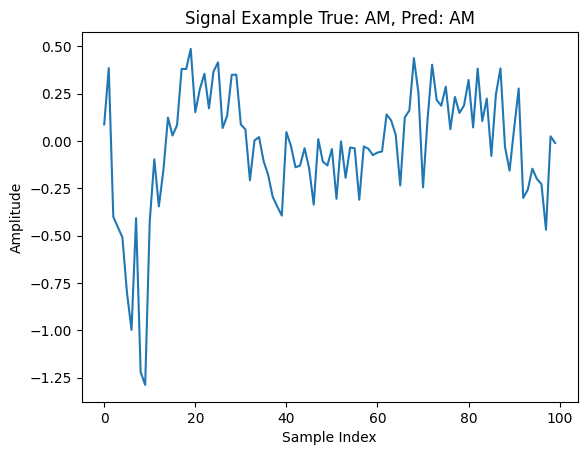

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

idx = 0
plt.plot(X_test[idx])
plt.title(f"Signal Example True: {y_test[idx]}, Pred: {y_pred[idx]}")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.show()
